STAT 451: Machine Learning (Fall 2021)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  


In [1]:
%load_ext watermark
%watermark -p mlxtend,scikit-learn

mlxtend     : 0.19.0
scikit-learn: 1.0



# 1) Confusion Matrix

## Loading the Breast Cancer Wisconsin dataset

- In the Breast Cancer Wisconsin dataset, the firt column in this dataset stores the unique ID numbers of patients
- The second column stores the corresponding cancer diagnoses (M = malignant, B = benign)
- Columns 3-32 contain features that were extracted from digitized images of the nuclei of the cancer cells, which can be used to build a model to predict whether a tumor is benign or malignant.
- The Breast Cancer Wisconsin dataset has been deposited in the UCI Machine Learning Repository, and more detailed information about this dataset can be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

<hr>

- First, we are converting the class labels from a string format into integers

In [4]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

- Here, class "M" (malignant cancer) will be converted to class 1, and "B" will be converted into class 0 (the order the class labels are mapped depends on the alphabetical order of the string labels)

In [5]:
le.transform(['M', 'B'])

array([1, 0])

- Next, we split the data into 80% training data and 20% test data, using a stratified split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

## 1) Confusion Matrix

More examples at 
- http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/
- and http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from mlxtend.evaluate import confusion_matrix
#or
#from sklearn.metrics import confusion_matrix



pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

print(confmat)

[[71  1]
 [ 3 39]]


### Multiclass to Binary

In [8]:
y_target =    [1, 1, 1, 0, 0, 2, 0, 3]
y_predicted = [1, 0, 1, 0, 0, 2, 1, 3]

cm1 = confusion_matrix(y_target=y_target, 
                       y_predicted=y_predicted)
print(cm1)

[[2 1 0 0]
 [1 2 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [9]:
cm2 = confusion_matrix(y_target=y_target, 
                       y_predicted=y_predicted,
                       positive_label=1,
                       binary=True)
print(cm2)

[[4 1]
 [1 2]]


### Visualizing a Confusion Matrix

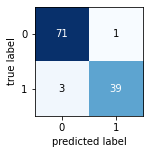

In [10]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=confmat, figsize=(2, 2))
plt.show()

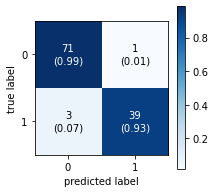

In [11]:
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()